In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().magic('matplotlib inline')

In [4]:
train = pd.read_csv('titanic_train.csv')

In [5]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
train.isnull().head()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0        False     False   False  False  False  False  False  False   False   
1        False     False   False  False  False  False  False  False   False   
2        False     False   False  False  False  False  False  False   False   
3        False     False   False  False  False  False  False  False   False   
4        False     False   False  False  False  False  False  False   False   

    Fare  Cabin  Embarked  
0  False   True     False  
1  False  False     False  
2  False   True     False  
3  False  False     False  
4  False   True     False

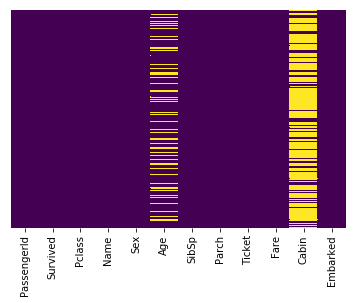

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
sns.set_style('whitegrid')

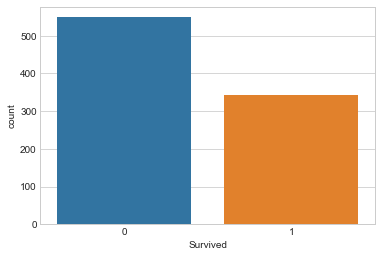

In [9]:
sns.countplot(x='Survived',data=train)

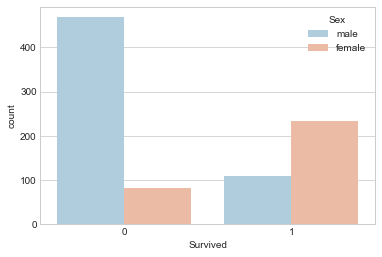

In [10]:
sns.countplot(x='Survived',data=train,hue='Sex',palette='RdBu_r')

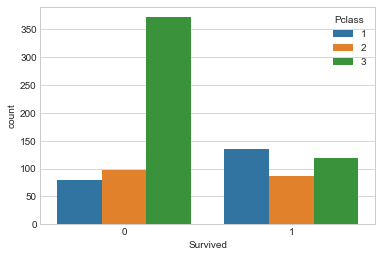

In [11]:
sns.countplot(x='Survived',data=train,hue='Pclass')

C:\Users\HOME\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


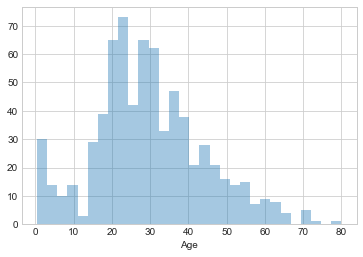

In [12]:
sns.distplot(train['Age'].dropna(),bins=30,kde=False)

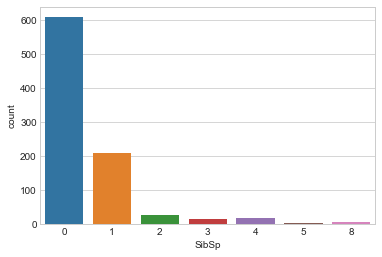

In [13]:
sns.countplot(x='SibSp',data=train)

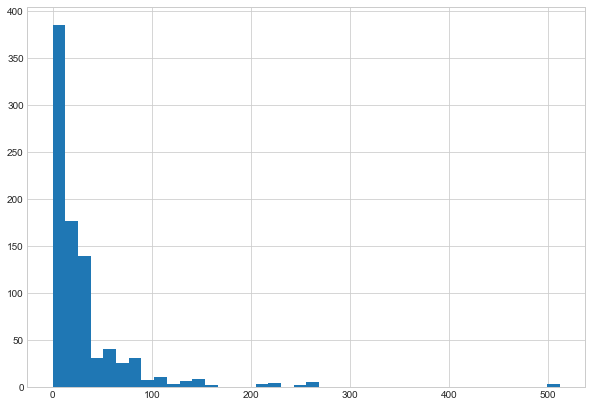

In [15]:
train['Fare'].hist(bins=40,figsize=(10,7))

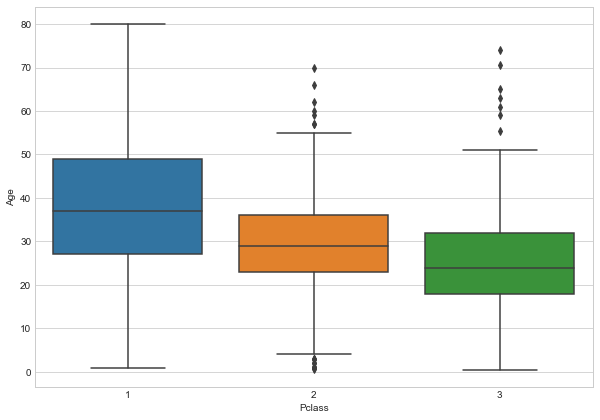

In [16]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [19]:
train.groupby('Pclass').mean()['Age'].round()

Pclass
1    38.0
2    30.0
3    25.0
Name: Age, dtype: float64

In [21]:
mean_class1 = train.groupby('Pclass').mean()['Age'].round().loc[1]
mean_class2 = train.groupby('Pclass').mean()['Age'].round().loc[2]
mean_class3 = train.groupby('Pclass').mean()['Age'].round().loc[3]

In [22]:
train.loc[train['Pclass']==1,'Age'] = train.loc[train['Pclass']==1,'Age'].fillna(value=mean_class1)
train.loc[train['Pclass']==2,'Age'] = train.loc[train['Pclass']==2,'Age'].fillna(value=mean_class2)
train.loc[train['Pclass']==3,'Age'] = train.loc[train['Pclass']==3,'Age'].fillna(value=mean_class3)


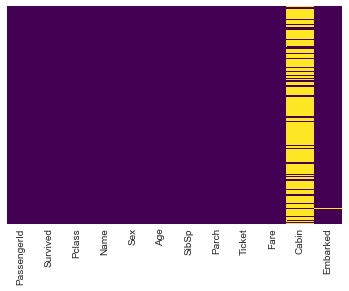

In [23]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [24]:
train.drop('Cabin',axis=1,inplace=True)

In [25]:
train.dropna(inplace=True) # dropping the 1 missing value in Embarked column

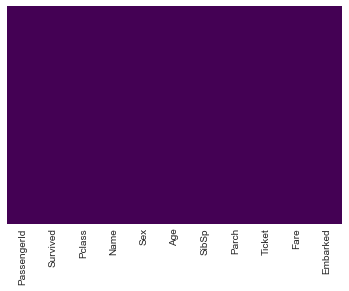

In [26]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [27]:
sex = pd.get_dummies(train['Sex'],drop_first=True)




In [28]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [29]:
train = pd.concat([train,sex,embark],axis=1)

In [30]:
train.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Embarked  male  Q  S  
0      0  A/5 21171   7.2500        S     1  0  1  
1      0   PC 17599  71.2833        C     0  0  0

In [31]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

train.drop('PassengerId',axis=1,inplace=True)

train.head()

Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         0       3  22.0      1      0   7.2500     1  0  1
1         1       1  38.0      1      0  71.2833     0  0  0
2         1       3  26.0      0      0   7.9250     0  0  1
3         1       1  35.0      1      0  53.1000     0  0  1
4         0       3  35.0      0      0   8.0500     1  0  1

PassengerId  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0          892       3  34.5      0      0   7.8292     1  1  0
1          893       3  47.0      1      0   7.0000     0  0  1
2          894       2  62.0      0      0   9.6875     1  1  0
3          895       3  27.0      0      0   8.6625     1  0  1
4          896       3  22.0      1      1  12.2875     0  0  1

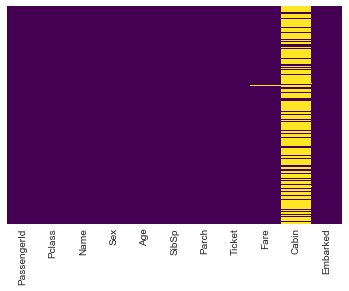

In [32]:
test = pd.read_csv('titanic_test.csv')

test.loc[test['Pclass']==1,'Age'] = test.loc[test['Pclass']==1,'Age'].fillna(value=mean_class1)
test.loc[test['Pclass']==2,'Age'] = test.loc[test['Pclass']==2,'Age'].fillna(value=mean_class2)
test.loc[test['Pclass']==3,'Age'] = test.loc[test['Pclass']==3,'Age'].fillna(value=mean_class3)


sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')



test.drop('Cabin',axis=1,inplace=True)

test.dropna(inplace=True)

sex = pd.get_dummies(test['Sex'],drop_first=True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)

test = pd.concat([test,sex,embark],axis=1)

test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

test.head()


In [33]:
X = train.drop('Survived',axis=1)
y = train['Survived']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

logmodel.score(X_train,y_train)

logmodel.score(X_test,y_test)

0.8089887640449438

In [34]:
test_x = test.drop('PassengerId',axis=1)

predictions = logmodel.predict(test_x)

final_prediction = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':predictions})

final_prediction.head()


PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1

In [35]:
final_prediction

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         1
19           911         1
20           912         0
21           913         0
22           914         1
23           915         1
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         1
391         1283         1
392         1284         0
393         1285         0
394         1286         0
395         1287         1
396         1288         0
397         1289         1
398         1290         0
399         1291         0
400         1292         1
401         1293         0
402         1294         1
403         1295         1
404         1296         0
405         1297         0
406         1298         0
407         1299         0
408         1300         1
409         1301         1
410         1302         1
411         1303         1
412         1304         1
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[417 rows x 2 columns]